# **Import Libraries**

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC


# **Load Dataset & Preprocessing**

In [ ]:
data = pd.read_csv("/content/sample_data/Dataset.xls - Shark.csv")

updated_dataset = data[['Attack', 'TurtleexactdiscretizeNC', 'MoonPhase', 'zscorewatertemp', 'WindSpeed_Normalised', 'turbidty_domain']]

enc = LabelEncoder()
updated_dataset['TurtleexactdiscretizeNC'] = enc.fit_transform(updated_dataset['TurtleexactdiscretizeNC'])
updated_dataset['MoonPhase'] = enc.fit_transform(updated_dataset['MoonPhase'])
updated_dataset['turbidty_domain'] = enc.fit_transform(updated_dataset['turbidty_domain'])
updated_dataset['Attack'] = enc.fit_transform(updated_dataset['Attack'])

dataset=updated_dataset.dropna(subset=['TurtleexactdiscretizeNC'])

print()
print()
print("Selected Dataset:")
print(dataset.head())
print()
print("Correlation Matrix:")
corr = dataset.corr()
plt.figure(figsize=(7,4), dpi=100)
sns.heatmap(corr,annot=True,cmap='coolwarm')

x, y = dataset.iloc[:, [1, 2, 3, 4, 5]], dataset.iloc[:, [0]]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=100)


# **Apply DL Algorithms**

In [ ]:
def logical_regression(x_train1, x_test1, y_train1, y_test1):
  LogReg = LogisticRegression()
  LogReg.fit(x_train, y_train1)
  predictions = LogReg.predict(x_test1)
  conf_mat = confusion_matrix(y_test1, predictions)
  score = accuracy_score(y_test1, predictions)
  report = classification_report(y_test1, predictions)
  fpr, tpr, threshold = roc_curve(y_test1, predictions)
  auc_out = auc(fpr, tpr)
  auc_out = auc(fpr, tpr)
  return conf_mat, score, report, fpr, tpr, auc_out


def random_forest(x_train2, x_test2, y_train2, y_test2):
    rfc = RandomForestClassifier()
    rfc.fit(x_train2, y_train2)
    predictions = rfc.predict(x_test2)
    conf_mat = confusion_matrix(y_test2, predictions)
    score = accuracy_score(y_test2, predictions)
    report = classification_report(y_test2, predictions)
    fpr, tpr, threshold = roc_curve(y_test2, predictions)
    auc_out = auc(fpr, tpr)
    return conf_mat, score, report, fpr, tpr, auc_out


def k_nearest_neighbour(x_train3, x_test3, y_train3, y_test3):
    knn = KNeighborsClassifier()
    knn.fit(x_train3, y_train3)
    predictions = knn.predict(x_test3)
    conf_mat = confusion_matrix(y_test3, predictions)
    score = accuracy_score(y_test3, predictions)
    report = classification_report(y_test3, predictions)
    fpr, tpr, threshold = roc_curve(y_test3, predictions)
    auc_out = auc(fpr, tpr)
    return conf_mat, score, report, fpr, tpr, auc_out


def naive_bayes(x_train4, x_test4, y_train4, y_test4):
    nb = GaussianNB()
    nb.fit(x_train4, y_train4)
    predictions = nb.predict(x_test4)
    conf_mat = confusion_matrix(y_test4, predictions)
    score = accuracy_score(y_test4, predictions)
    report = classification_report(y_test4, predictions)
    fpr, tpr, threshold = roc_curve(y_test4, predictions)
    auc_out = auc(fpr, tpr)
    return conf_mat, score, report, fpr, tpr, auc_out


def support_vector_machine(x_train5, x_test5, y_train5, y_test5):
    svc = SVC(kernel="linear")
    svc.fit(x_train5, y_train5)
    predictions = svc.predict(x_test5)
    conf_mat = confusion_matrix(y_test5, predictions)
    score = accuracy_score(y_test5, predictions)
    report = classification_report(y_test5, predictions)
    fpr, tpr, threshold = roc_curve(y_test5, predictions)
    auc_out = auc(fpr, tpr)
    return conf_mat, score, report, fpr, tpr, auc_out


confusion_matrix1, score1, report1, fpr1, tpr1, auc1 = logical_regression(x_train, x_test, y_train, y_test)
confusion_matrix2, score2, report2, fpr2, tpr2, auc2 = random_forest(x_train, x_test, y_train, y_test)
confusion_matrix3, score3, report3, fpr3, tpr3, auc3 = k_nearest_neighbour(x_train, x_test, y_train, y_test)
confusion_matrix4, score4, report4, fpr4, tpr4, auc4 = naive_bayes(x_train, x_test, y_train, y_test)
confusion_matrix5, score5, report5, fpr5, tpr5, auc5 = support_vector_machine(x_train, x_test, y_train, y_test)

print("______________________________________________________________________")
print()
print("For Logical Regression,")
print("Confusion Matrix:")
print(confusion_matrix1)
print("Accuracy Score:", '%.1f'%(score1*100), "%")
print("Classification Report:")
print(report1)
print("______________________________________________________________________")
print()
print("For Random forest,")
print("Confusion Matrix:")
print(confusion_matrix2)
print("Accuracy Score:", '%.1f'%(score2*100), "%")
print("Classification Report:")
print(report2)
print("______________________________________________________________________")
print()
print("For K-Nearest Neighbor,")
print("Confusion Matrix:")
print(confusion_matrix3)
print("Accuracy Score:", '%.1f'%(score3*100), "%")
print("Classification Report:")
print(report3)
print("______________________________________________________________________")
print()
print("For Naive Bayes,")
print("Confusion Matrix:") 
print(confusion_matrix4)
print("Accuracy Score:", '%.1f'%(score4*100), "%")
print("Classification Report:")
print(report4)
print("______________________________________________________________________")
print()
print("For Support Vector Machine,")
print("Confusion Matrix:")
print(confusion_matrix5)
print("Accuracy Score:", '%.1f'%(score5*100), "%")
print("Classification Report:")
print(report5)
print()


# **AUC Plot & ROC Curve**

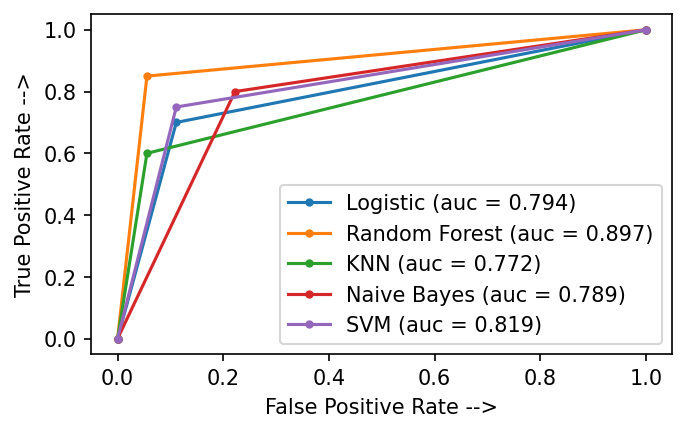

In [ ]:
plt.figure(figsize=(5, 3), dpi=150)
plt.plot(fpr1, tpr1, marker='.', label='Logistic (auc = %0.3f)' % auc1)
plt.plot(fpr2, tpr2, marker='.', label='Random Forest (auc = %0.3f)' % auc2)
plt.plot(fpr3, tpr3, marker='.', label='KNN (auc = %0.3f)' % auc3)
plt.plot(fpr4, tpr4, marker='.', label='Naive Bayes (auc = %0.3f)' % auc4)
plt.plot(fpr5, tpr5, marker='.', label='SVM (auc = %0.3f)' % auc5)


plt.xlabel('False Positive Rate -->')
plt.ylabel('True Positive Rate -->')

plt.legend()

plt.show()